# Data Generation

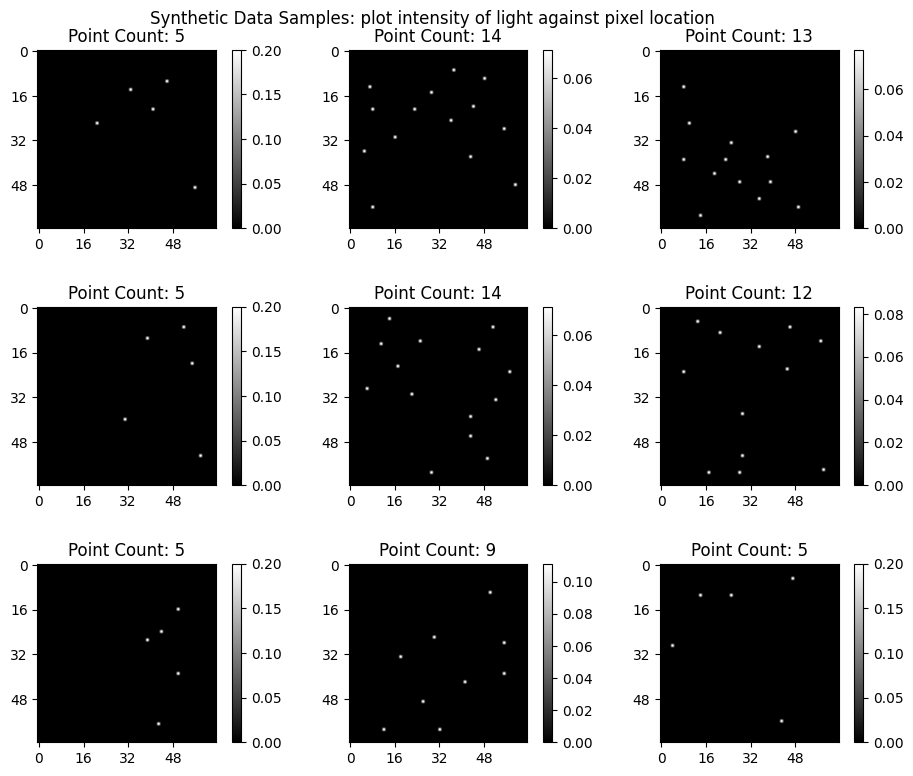

In [1]:
# Data Generation
from vanillanet.data import DiscretePointsDataset
from vanillanet.metrics import _normalize_intensity
import numpy as np
import matplotlib.pyplot as plt
import torch

plot_data = DiscretePointsDataset(num_samples=9, size=64, min_points=5, max_points=15, min_distance = 5, border = 4)

# Visualize the data
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.suptitle('Synthetic Data Samples: plot intensity of light against pixel location')
    normalized_data = _normalize_intensity(plot_data[i].unsqueeze(0))
    data_tensor = torch.from_numpy(normalized_data.squeeze(0).squeeze(0).numpy())
    im = plt.imshow(data_tensor, cmap='gray')
    plt.title(f'Point Count: {plot_data.get_point_count(i)}')
    
    # plt.xlabel('X (pixels)')
    # plt.ylabel('Y (pixels)')
    plt.xticks(np.arange(0, 64, 16))  # Show every 16th pixel
    plt.yticks(np.arange(0, 64, 16))  

    # Adjust spacing to prevent title overlap
    plt.tight_layout(pad=2.0)  # Add padding between subplots
    plt.subplots_adjust(top=0.93)  # Make room for the main title

    plt.colorbar(im, ax=plt.gca())
plt.savefig('images/synthetic_data_samples.png', bbox_inches='tight')

# Neural Network

TODO: Would be nice to change train_model to take in different models (not just VanillaNet which is currently hardcoded)

Training samples: 800, Validation samples: 200
Training Epoch 1


Epoch 1: 100%|██████████| 25/25 [00:04<00:00,  6.14it/s]


  Val breakdown: Inefficiency=0.203984, Non-uniformity=0.101660, Total=10165955.520000
Epoch [1/10] - Train Loss: 28331691.6000 - Val Loss: 10165955.5200 - LR: 0.001000
  -> New best validation loss: 10165955.5200
Training Epoch 2


Epoch 2: 100%|██████████| 25/25 [00:03<00:00,  7.11it/s]


  Val breakdown: Inefficiency=0.203905, Non-uniformity=0.057104, Total=5710398.460000
Epoch [2/10] - Train Loss: 9443220.4400 - Val Loss: 5710398.4600 - LR: 0.001000
  -> New best validation loss: 5710398.4600
Training Epoch 3


Epoch 3: 100%|██████████| 25/25 [00:03<00:00,  7.06it/s]


  Val breakdown: Inefficiency=0.203693, Non-uniformity=0.045163, Total=4516268.140000
Epoch [3/10] - Train Loss: 5196871.0400 - Val Loss: 4516268.1400 - LR: 0.001000
  -> New best validation loss: 4516268.1400
Training Epoch 4


Epoch 4: 100%|██████████| 25/25 [00:03<00:00,  7.03it/s]


  Val breakdown: Inefficiency=0.203684, Non-uniformity=0.036651, Total=3665118.570000
Epoch [4/10] - Train Loss: 3318576.9100 - Val Loss: 3665118.5700 - LR: 0.000500
  -> New best validation loss: 3665118.5700
Training Epoch 5


Epoch 5: 100%|██████████| 25/25 [00:03<00:00,  6.67it/s]


  Val breakdown: Inefficiency=0.203667, Non-uniformity=0.036675, Total=3667525.680000
Epoch [5/10] - Train Loss: 2392285.9400 - Val Loss: 3667525.6800 - LR: 0.000500
  -> No improvement for 1 epochs
Training Epoch 6


Epoch 6: 100%|██████████| 25/25 [00:03<00:00,  6.62it/s]


  Val breakdown: Inefficiency=0.203684, Non-uniformity=0.036556, Total=3655646.080000
Epoch [6/10] - Train Loss: 2122601.1950 - Val Loss: 3655646.0800 - LR: 0.000500
  -> New best validation loss: 3655646.0800
Training Epoch 7


Epoch 7: 100%|██████████| 25/25 [00:03<00:00,  6.95it/s]


  Val breakdown: Inefficiency=0.203672, Non-uniformity=0.035137, Total=3513691.510000
Epoch [7/10] - Train Loss: 1618278.6700 - Val Loss: 3513691.5100 - LR: 0.000250
  -> New best validation loss: 3513691.5100
Training Epoch 8


Epoch 8: 100%|██████████| 25/25 [00:03<00:00,  7.13it/s]


  Val breakdown: Inefficiency=0.203668, Non-uniformity=0.035137, Total=3513700.630000
Epoch [8/10] - Train Loss: 1201503.4000 - Val Loss: 3513700.6300 - LR: 0.000250
  -> No improvement for 1 epochs
Training Epoch 9


Epoch 9: 100%|██████████| 25/25 [00:03<00:00,  6.91it/s]


  Val breakdown: Inefficiency=0.203677, Non-uniformity=0.034631, Total=3463055.290000
Epoch [9/10] - Train Loss: 1057249.3875 - Val Loss: 3463055.2900 - LR: 0.000250
  -> New best validation loss: 3463055.2900
Training Epoch 10


Epoch 10: 100%|██████████| 25/25 [00:03<00:00,  7.63it/s]


  Val breakdown: Inefficiency=0.203674, Non-uniformity=0.034823, Total=3482283.510000
Epoch [10/10] - Train Loss: 829978.0700 - Val Loss: 3482283.5100 - LR: 0.000125
  -> No improvement for 1 epochs
Training complete.
Best validation loss: 3463055.2900


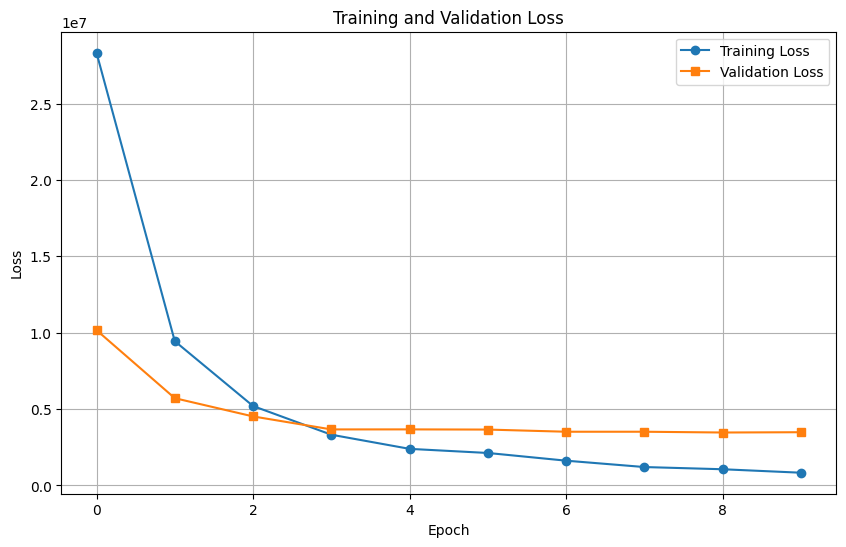

<Figure size 640x480 with 0 Axes>

In [2]:
from vanillanet.neural_net import train_model
from vanillanet.data import DiscretePointsDataset
from matplotlib import pyplot as plt
import torch

model, device, dataset, train_losses, val_losses = train_model(num_epochs = 10, lr = 1e-3, size = 64, batch_size=32,
                dataset = DiscretePointsDataset(num_samples=1000, size=64, min_points=5, max_points=15, min_distance = 5, border = 4))

# torch.save(model.state_dict(), 'models/model1.pth')
# model.load_state_dict(torch.load('models/model1.pth'))

# Plot training curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('images/training_and_validation_loss.png', bbox_inches='tight')

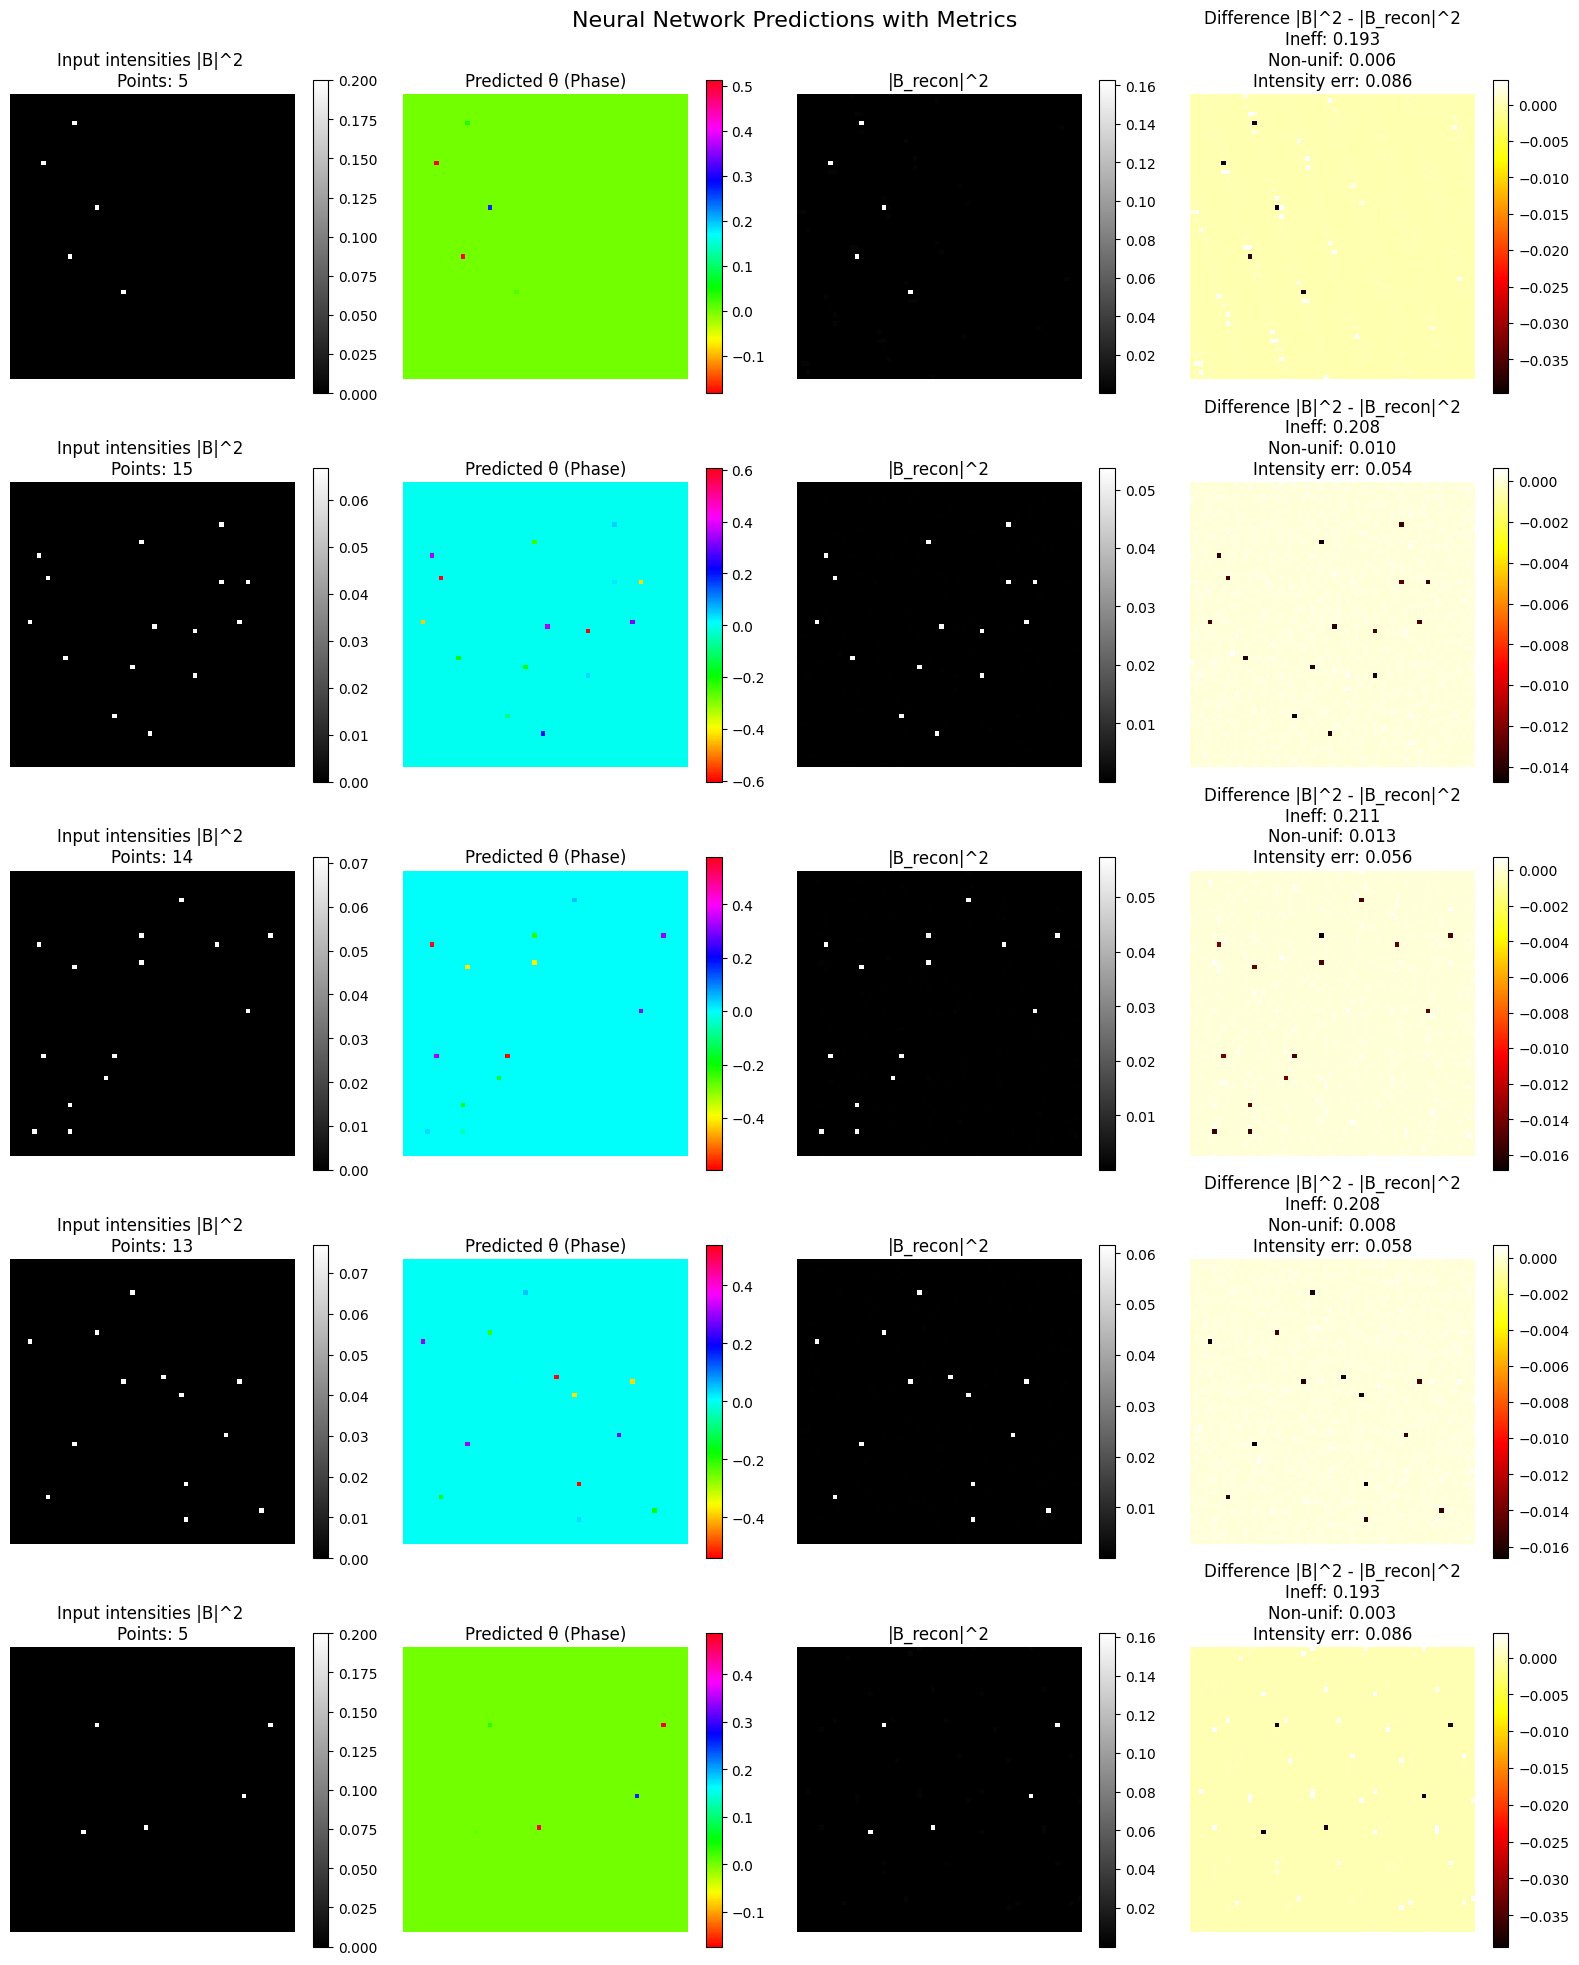

In [2]:
from vanillanet.neural_net import visualize_results_with_metrics
visualize_results_with_metrics(model, dataset, device, num_samples=5, debug = False)

# Gradient Descent (sparse representation)


--- Processing Sample 1/5 (Index 41) ---


/Users/qugao/Documents/ETH Zurich/SemesterProjectFS2025/qugao_computer_holography/.venv/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



--- Processing Sample 2/5 (Index 49) ---

--- Processing Sample 3/5 (Index 28) ---

--- Processing Sample 4/5 (Index 33) ---

--- Processing Sample 5/5 (Index 47) ---


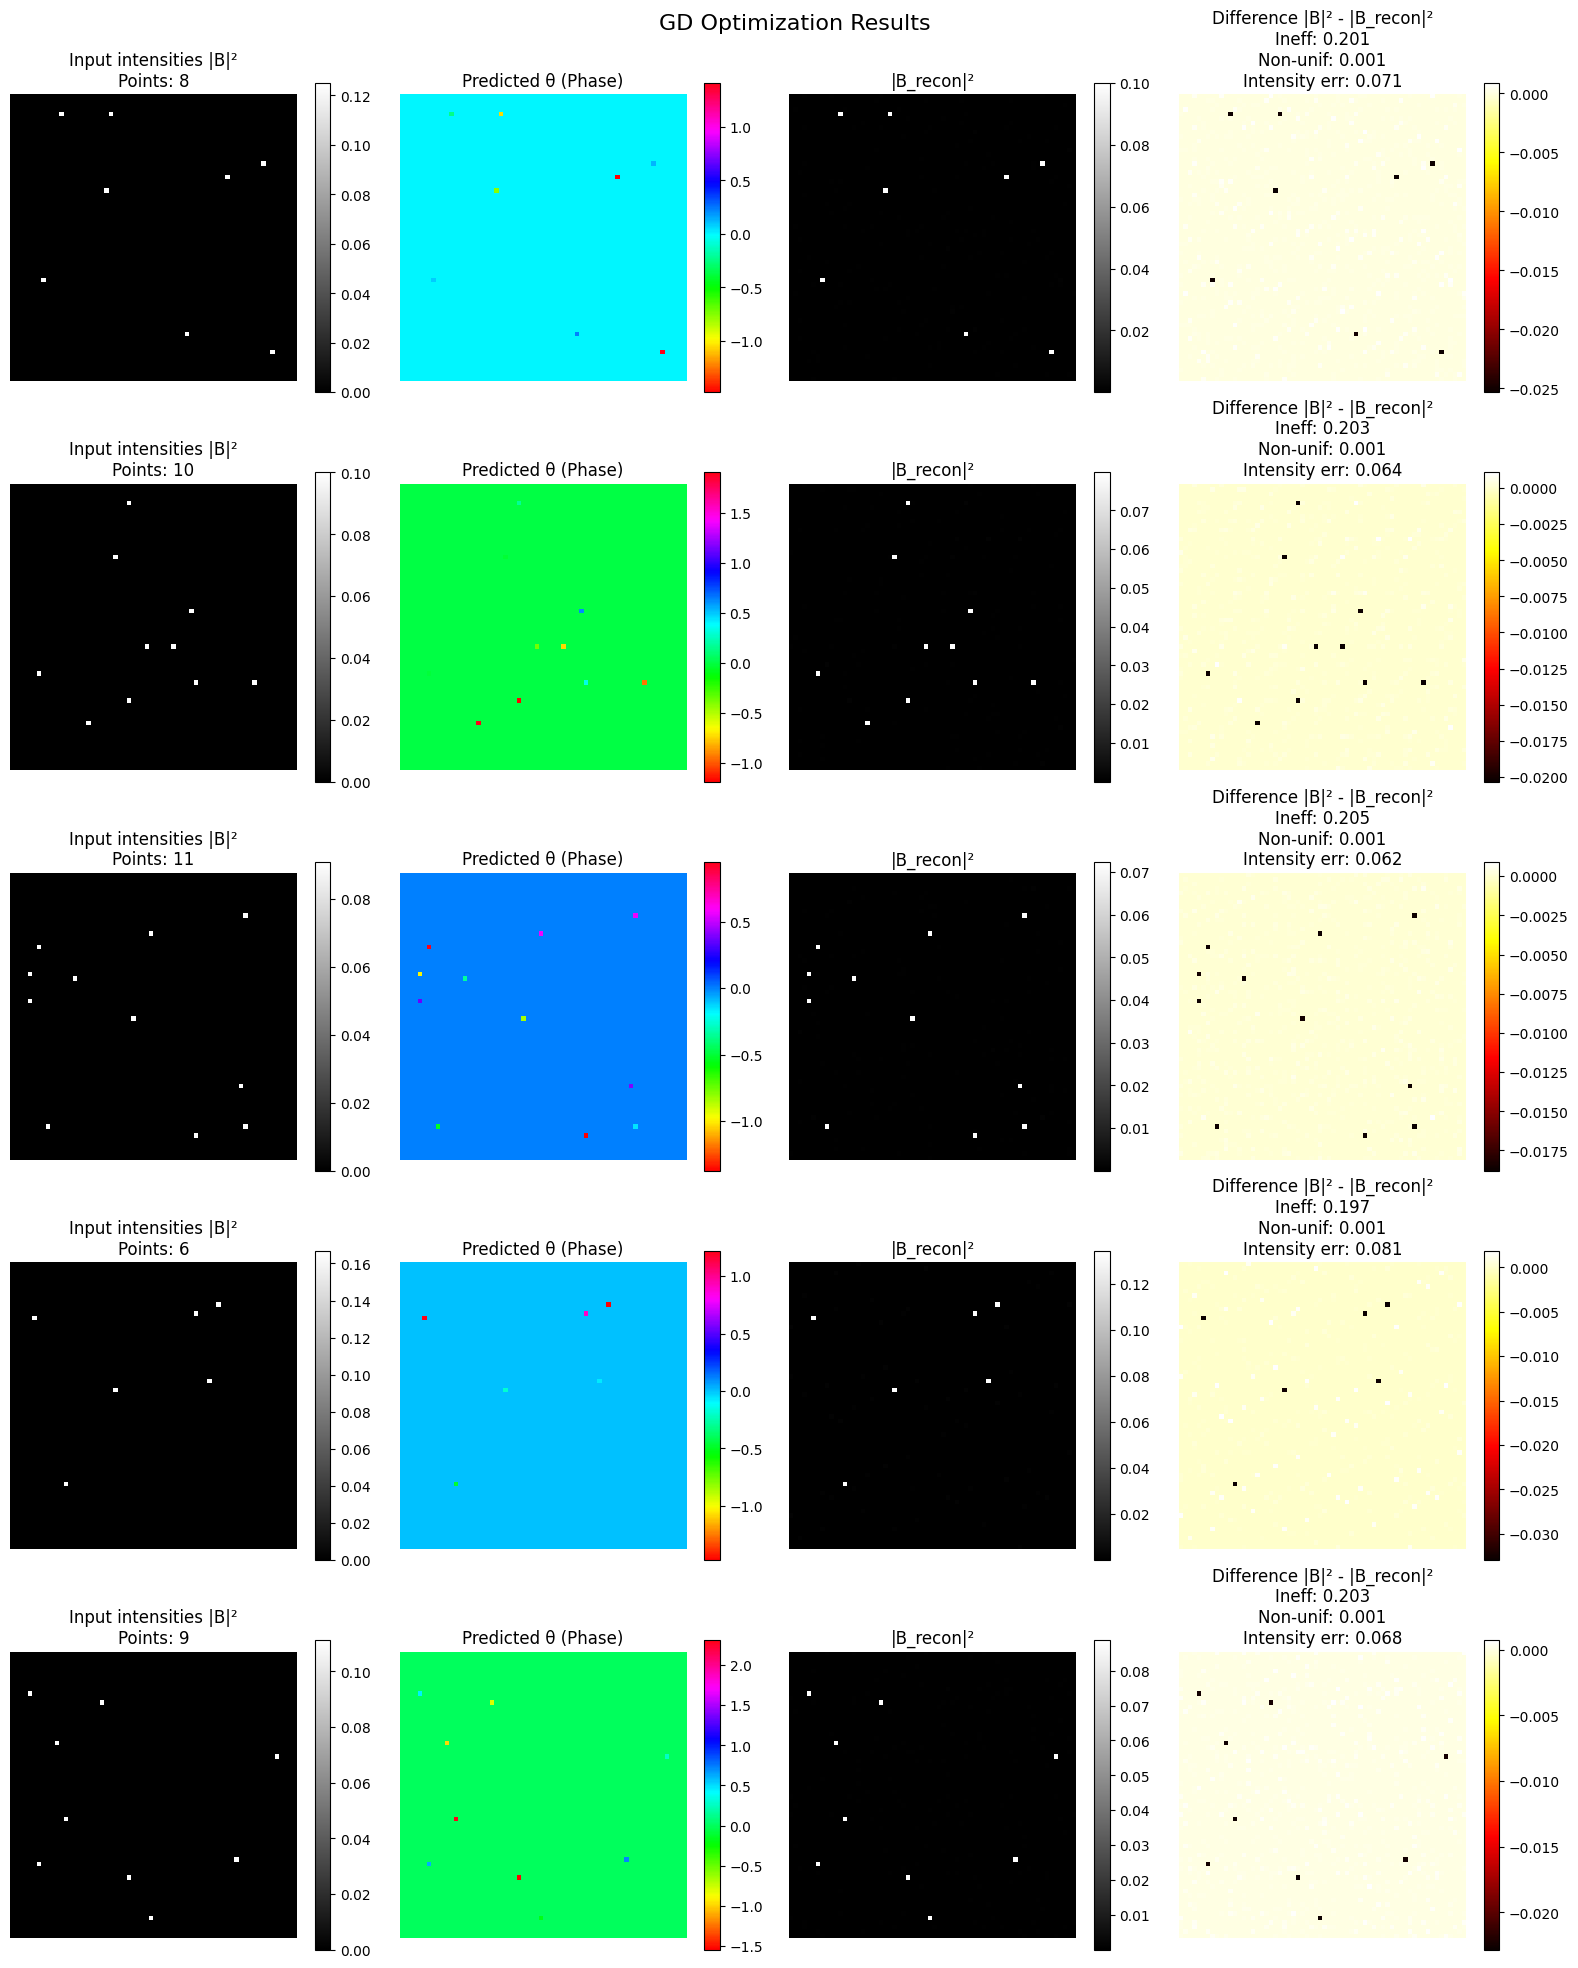


GD OPTIMIZATION RESULTS SUMMARY
Sample       Index  Points Efficiency Ineff    Non-unif Amp err  Final Loss
--------------------------------------------------------------------------------
sample_0     41     8      0.7988     0.201    0.001    0.071    1.2833    
sample_1     49     10     0.7975     0.203    0.001    0.064    2.0969    
sample_2     28     11     0.7946     0.205    0.001    0.062    1.2567    
sample_3     33     6      0.8028     0.197    0.001    0.081    1.1656    
sample_4     47     9      0.7968     0.203    0.001    0.068    3.1804    
--------------------------------------------------------------------------------
AVERAGE                    0.7981     0.202    0.001    0.069    1.7966    


In [3]:
from vanillanet.grad_des import visualize_gd_results_with_metrics
from vanillanet.data import DiscretePointsDataset
from vanillanet.device import get_device

device = get_device()

all_metrics, all_results = visualize_gd_results_with_metrics(
    dataset=DiscretePointsDataset(num_samples=100, size=64, min_points=5, max_points=15),
    device=device,
    num_samples=5,
    save_path='images/GD_sample_predictions.png',
    show_metrics=True,
    debug=False,
    iterations=1000,
    lr=0.01,
    verbose=True,
    var_cost = 1000, 
    show_loss_plot=False
)

# Gradient Descent (full representation)

# Gerchberg Saxton (Standard and Weighted)

Testing GS algorithm on 5 samples...
Using device: cpu

--- Sample 1 ---
Weighted GS quality requirements:
  Inefficiency must be < 0.3
  Non-uniformity must be < 0.1
Iteration 1: Waiting for stability...
  Inefficiency change: inf (need < 1e-06)
  Non-uniformity change: inf (need < 1e-06)
Iteration 1/100
  MSE Error: 4095.652832
  Inefficiency: 0.996518
  Non-uniformity: 0.843893
Iteration 11/100
  MSE Error: 4090.357910
  Inefficiency: 0.203527
  Non-uniformity: 0.002471
Iteration 21/100
  MSE Error: 4090.352783
  Inefficiency: 0.202117
  Non-uniformity: 0.000898
Iteration 31/100
  MSE Error: 4090.351807
  Inefficiency: 0.201807
  Non-uniformity: 0.000618
Iteration 41/100
  MSE Error: 4090.350586
  Inefficiency: 0.201366
  Non-uniformity: 0.000653
Iteration 51: Waiting for stability...
  Inefficiency change: 0.00006145 (need < 1e-06)
  Non-uniformity change: 0.00000373 (need < 1e-06)
Iteration 51/100
  MSE Error: 4090.348389
  Inefficiency: 0.200798
  Non-uniformity: 0.000620
Iterati

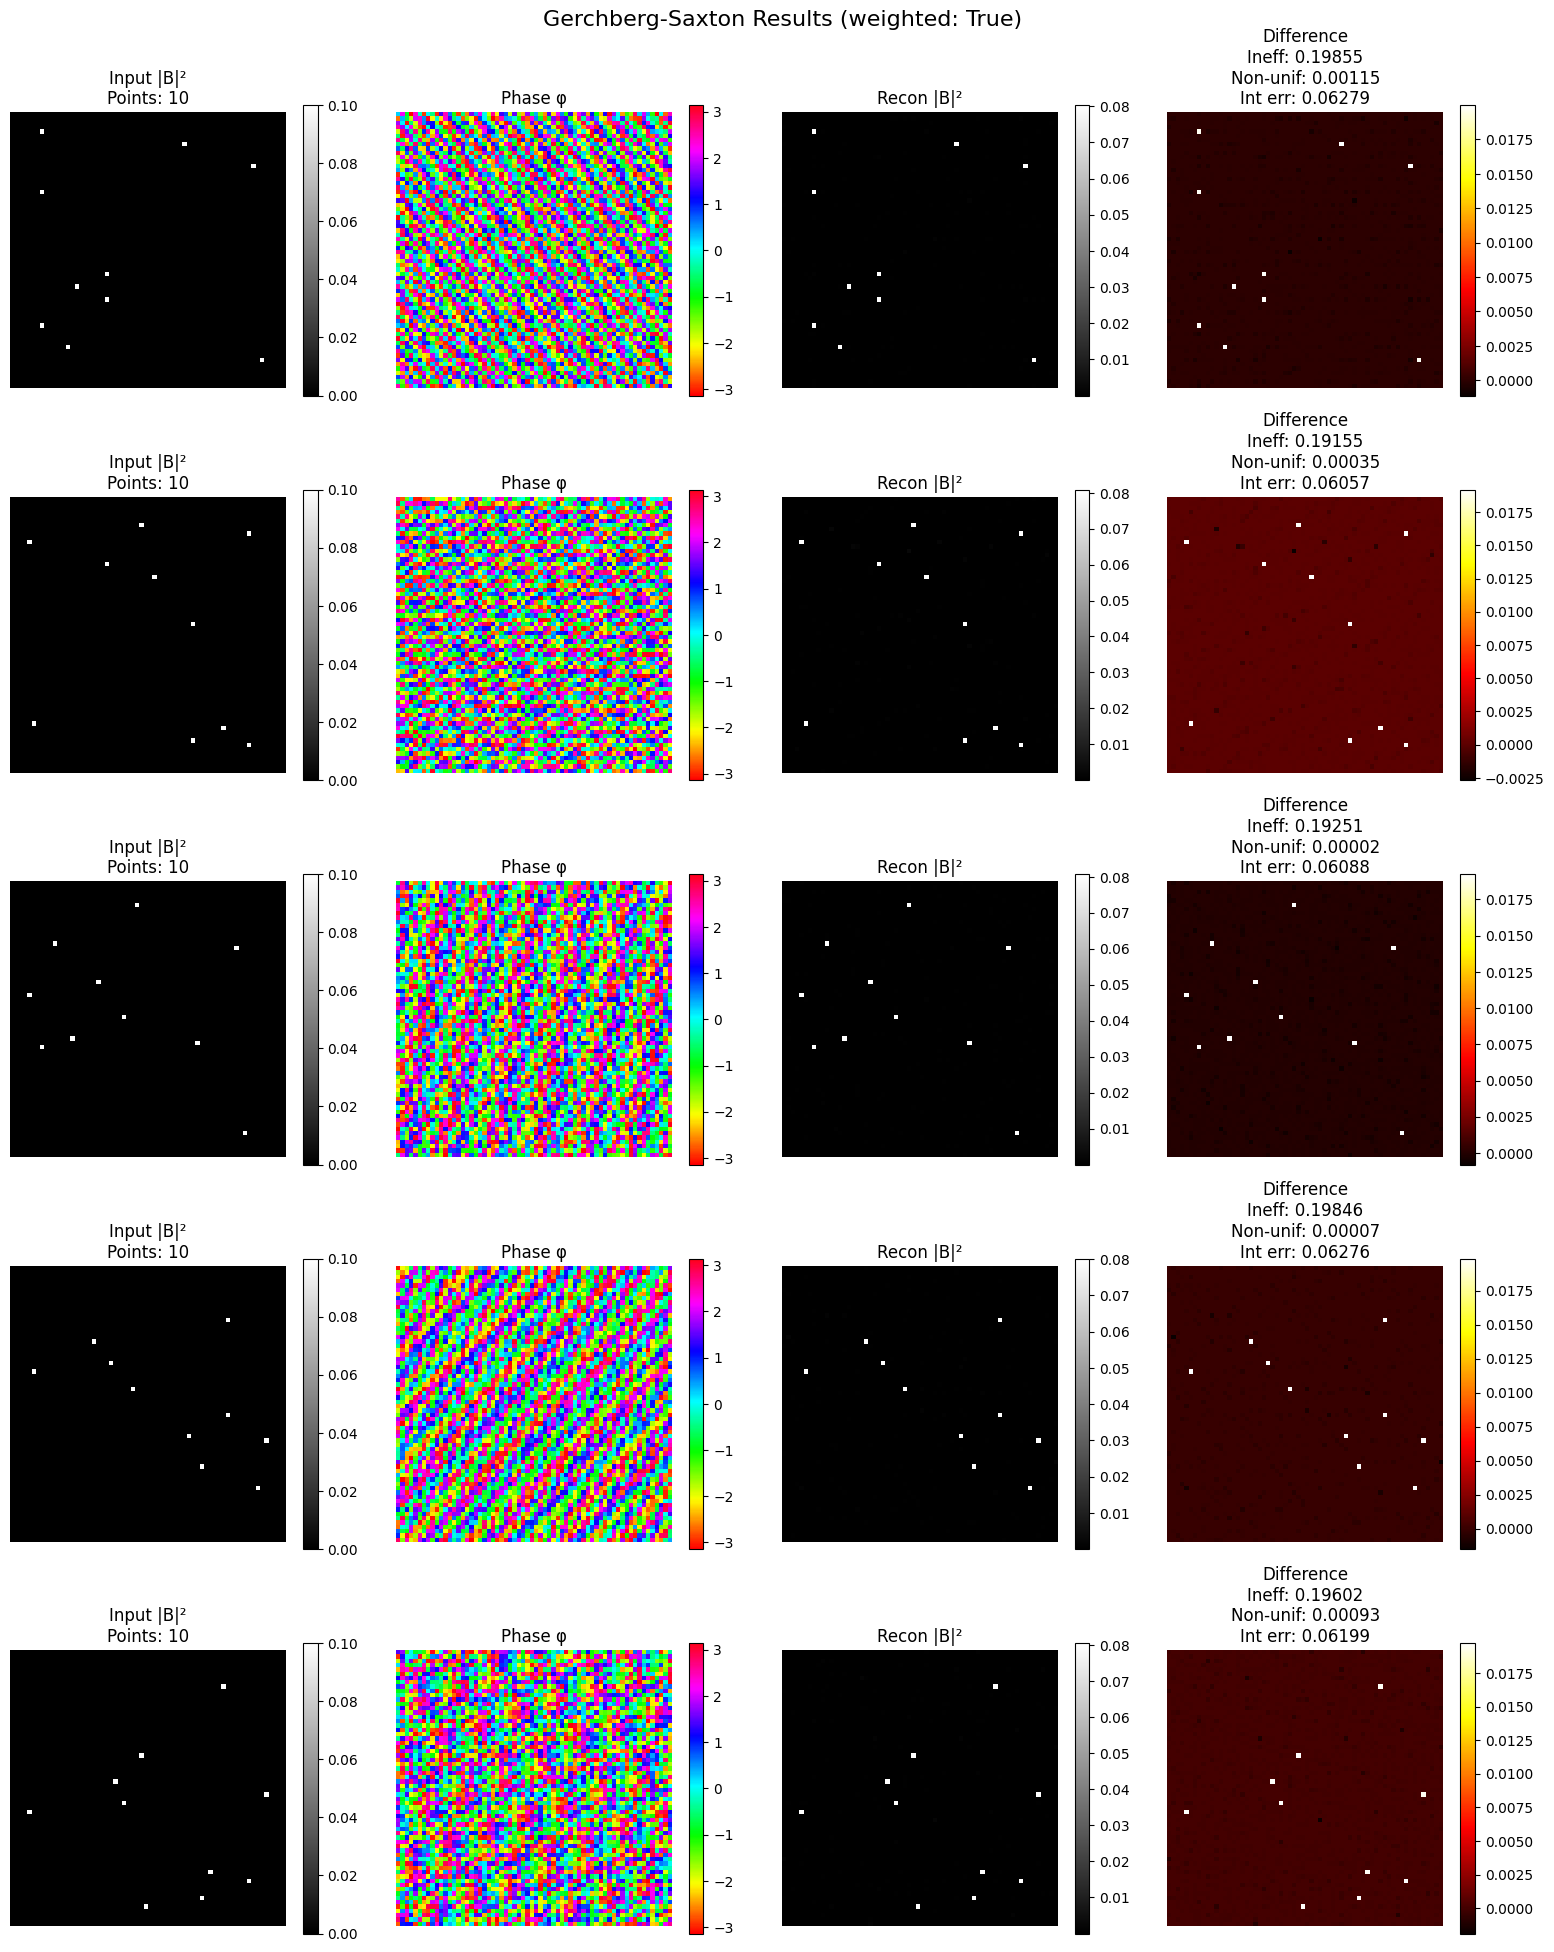


GS Algorithm Results Summary:
Weighted: True
Sample   Points Ineff    Non-unif Intensity err
--------------------------------------------------
Sample 1  10     0.199    0.001    0.063   
Sample 2  10     0.192    0.000    0.061   
Sample 3  10     0.193    0.000    0.061   
Sample 4  10     0.198    0.000    0.063   
Sample 5  10     0.196    0.001    0.062   


In [4]:
from vanillanet.gs import test_gerchberg_saxton

weighted_results = test_gerchberg_saxton(debug = False, weighted=True, num_iterations = 100, num_samples = 5)

Testing GS algorithm on 15 samples...
Using device: cpu

--- Sample 1 ---
Iteration 1/100
  MSE Error: 4095.737793
  Inefficiency: 0.998075
  Non-uniformity: 0.593664
Iteration 11/100
  MSE Error: 4090.349609
  Inefficiency: 0.201114
  Non-uniformity: 0.019904
Iteration 21/100
  MSE Error: 4090.342773
  Inefficiency: 0.199127
  Non-uniformity: 0.025268
Iteration 31/100
  MSE Error: 4090.333496
  Inefficiency: 0.196503
  Non-uniformity: 0.027336
Iteration 41/100
  MSE Error: 4090.331299
  Inefficiency: 0.195891
  Non-uniformity: 0.031956
Iteration 51/100
  MSE Error: 4090.330811
  Inefficiency: 0.195709
  Non-uniformity: 0.031825
Iteration 61/100
  MSE Error: 4090.330566
  Inefficiency: 0.195581
  Non-uniformity: 0.029675
Iteration 71/100
  MSE Error: 4090.330078
  Inefficiency: 0.195456
  Non-uniformity: 0.028943
Iteration 81/100
  MSE Error: 4090.330078
  Inefficiency: 0.195356
  Non-uniformity: 0.029262
Iteration 91/100
  MSE Error: 4090.329102
  Inefficiency: 0.195266
  Non-uniformi

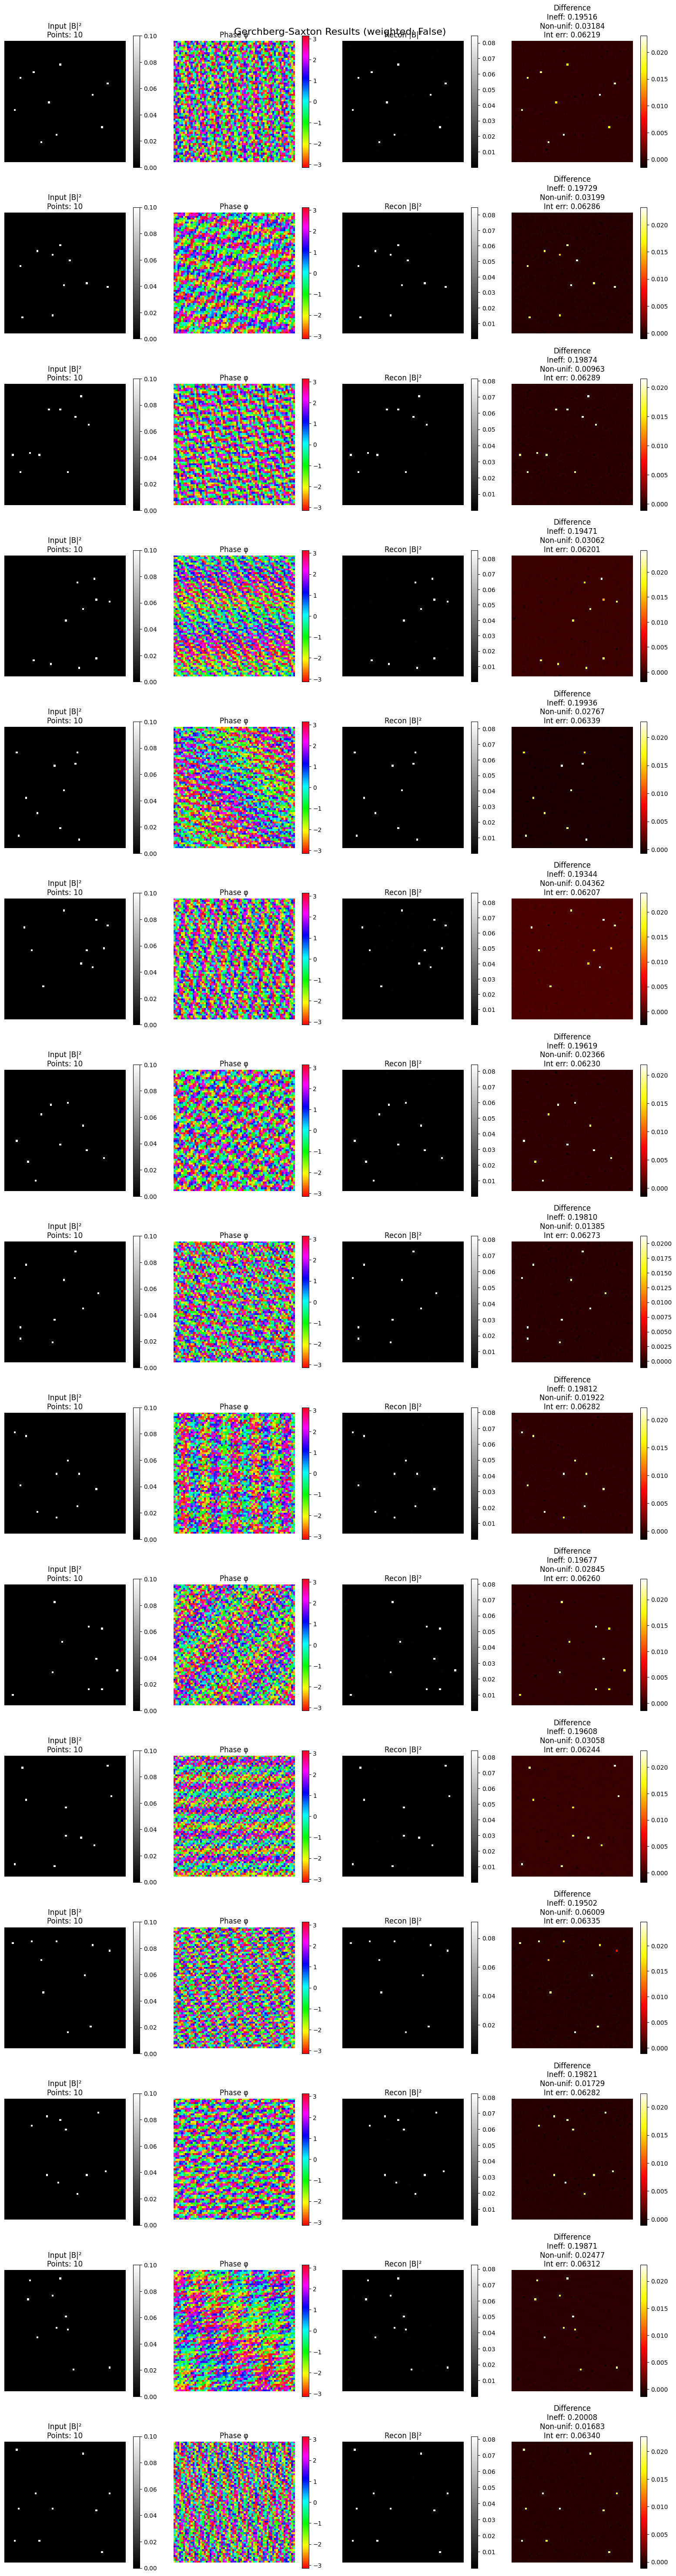


GS Algorithm Results Summary:
Weighted: False
Sample   Points Ineff    Non-unif Intensity err
--------------------------------------------------
Sample 1  10     0.195    0.032    0.062   
Sample 2  10     0.197    0.032    0.063   
Sample 3  10     0.199    0.010    0.063   
Sample 4  10     0.195    0.031    0.062   
Sample 5  10     0.199    0.028    0.063   
Sample 6  10     0.193    0.044    0.062   
Sample 7  10     0.196    0.024    0.062   
Sample 8  10     0.198    0.014    0.063   
Sample 9  10     0.198    0.019    0.063   
Sample 10 10     0.197    0.028    0.063   
Sample 11 10     0.196    0.031    0.062   
Sample 12 10     0.195    0.060    0.063   
Sample 13 10     0.198    0.017    0.063   
Sample 14 10     0.199    0.025    0.063   
Sample 15 10     0.200    0.017    0.063   


In [10]:
non_weighted_results = test_gerchberg_saxton(debug = False, weighted=False, num_iterations = 100, num_samples = 15)

# 4 Way Comparison 

Comparing all methods on 10 samples...
Using device: mps
Model device: mps:0

--- Sample 1 (Index 275) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.843506
  Inefficiency: 0.998695
  Non-uniformity: 0.467208
Iteration 11/2000
  MSE Error: 4091.985107
  Inefficiency: 0.193382
  Non-uniformity: 0.003164
Iteration 21/2000
  MSE Error: 4091.984863
  Inefficiency: 0.193338
  Non-uniformity: 0.001766
Iteration 31/2000
  MSE Error: 4091.984863
  Inefficiency: 0.193219
  Non-uniformity: 0.002157
Iteration 41/2000
  MSE Error: 4091.984375
  Inefficiency: 0.193159
  Non-uniformity: 0.003244
Iteration 51/2000
  MSE Error: 4091.984863
  Inefficiency: 0.193142
  Non-uniformity: 0.003219
Iteration 61/2000
  MSE Error: 4091.984619
  Inefficiency: 0.193132
  Non-uniformity: 0.002984
Iteration 71/2000
  MSE Error: 4091.984619
  Inefficiency: 0.193121
  Non-uniformity: 0.002730
Iteration 81/2000
  MSE Error: 4091.984375
  Inefficiency: 0.193105
  Non-uniformity: 0.002880


/Users/qugao/Documents/ETH Zurich/SemesterProjectFS2025/qugao_computer_holography/.venv/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


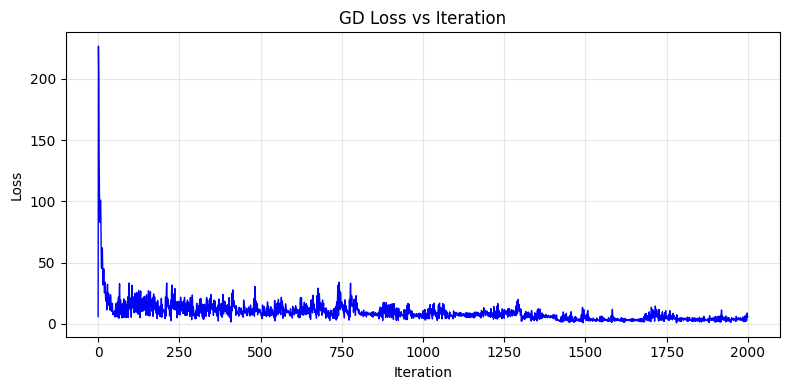

Loss decreased from 5.940386 to 5.484230
Total improvement: 7.68%
Running Neural Network...

--- Sample 2 (Index 880) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.714844
  Inefficiency: 0.997169
  Non-uniformity: 1.141076
Iteration 11/2000
  MSE Error: 4090.360840
  Inefficiency: 0.204049
  Non-uniformity: 0.021692
Iteration 21/2000
  MSE Error: 4090.356934
  Inefficiency: 0.203072
  Non-uniformity: 0.021737
Iteration 31/2000
  MSE Error: 4090.352051
  Inefficiency: 0.201702
  Non-uniformity: 0.018894
Iteration 41/2000
  MSE Error: 4090.349365
  Inefficiency: 0.200872
  Non-uniformity: 0.018654
Iteration 51/2000
  MSE Error: 4090.346680
  Inefficiency: 0.200080
  Non-uniformity: 0.022117
Iteration 61/2000
  MSE Error: 4090.345215
  Inefficiency: 0.199580
  Non-uniformity: 0.024993
Iteration 71/2000
  MSE Error: 4090.344238
  Inefficiency: 0.199321
  Non-uniformity: 0.026237
Iteration 81/2000
  MSE Error: 4090.343506
  Inefficiency: 0.199193
  Non-unifor

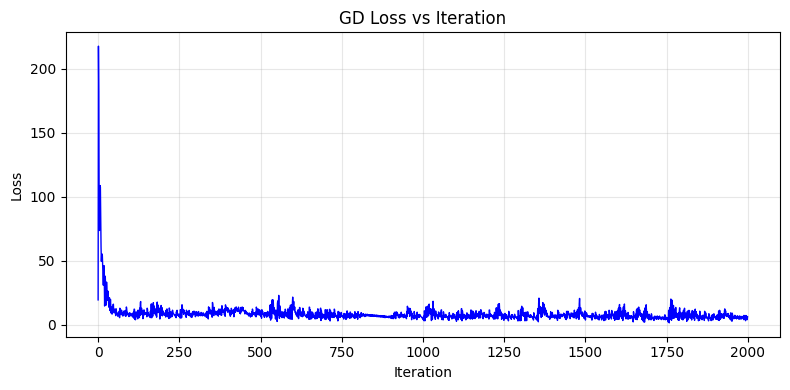

Loss decreased from 19.438251 to 6.299659
Total improvement: 67.59%
Running Neural Network...

--- Sample 3 (Index 320) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.811523
  Inefficiency: 0.998522
  Non-uniformity: 1.257586
Iteration 11/2000
  MSE Error: 4090.642578
  Inefficiency: 0.201932
  Non-uniformity: 0.017530
Iteration 21/2000
  MSE Error: 4090.641602
  Inefficiency: 0.201625
  Non-uniformity: 0.019678
Iteration 31/2000
  MSE Error: 4090.641602
  Inefficiency: 0.201495
  Non-uniformity: 0.020386
Iteration 41/2000
  MSE Error: 4090.641113
  Inefficiency: 0.201430
  Non-uniformity: 0.021118
Iteration 51/2000
  MSE Error: 4090.640869
  Inefficiency: 0.201381
  Non-uniformity: 0.021887
Iteration 61/2000
  MSE Error: 4090.640625
  Inefficiency: 0.201332
  Non-uniformity: 0.022742
Iteration 71/2000
  MSE Error: 4090.640625
  Inefficiency: 0.201278
  Non-uniformity: 0.023650
Iteration 81/2000
  MSE Error: 4090.640137
  Inefficiency: 0.201199
  Non-unif

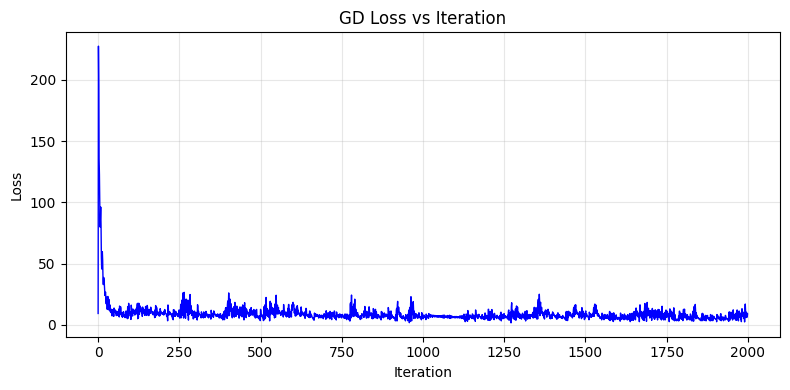

Loss decreased from 9.365868 to 8.864028
Total improvement: 5.36%
Running Neural Network...

--- Sample 4 (Index 248) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.722168
  Inefficiency: 0.997615
  Non-uniformity: 0.589939
Iteration 11/2000
  MSE Error: 4090.645508
  Inefficiency: 0.202695
  Non-uniformity: 0.025343
Iteration 21/2000
  MSE Error: 4090.643311
  Inefficiency: 0.201895
  Non-uniformity: 0.024505
Iteration 31/2000
  MSE Error: 4090.640869
  Inefficiency: 0.201254
  Non-uniformity: 0.027297
Iteration 41/2000
  MSE Error: 4090.639160
  Inefficiency: 0.200731
  Non-uniformity: 0.031135
Iteration 51/2000
  MSE Error: 4090.637695
  Inefficiency: 0.200298
  Non-uniformity: 0.031089
Iteration 61/2000
  MSE Error: 4090.636230
  Inefficiency: 0.199947
  Non-uniformity: 0.026922
Iteration 71/2000
  MSE Error: 4090.635254
  Inefficiency: 0.199712
  Non-uniformity: 0.021259
Iteration 81/2000
  MSE Error: 4090.635010
  Inefficiency: 0.199552
  Non-unifor

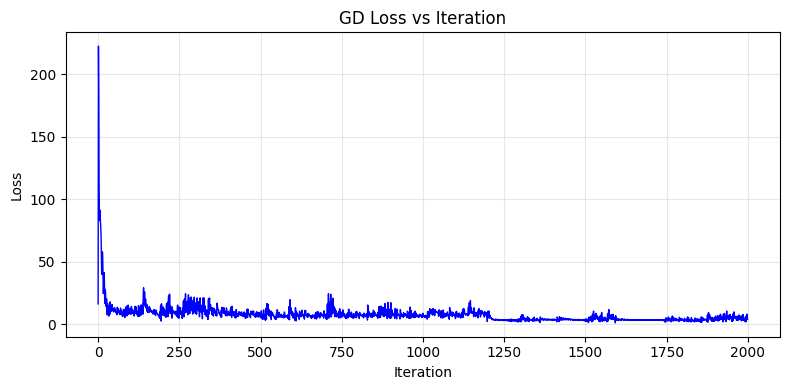

Loss decreased from 16.112951 to 3.768286
Total improvement: 76.61%
Running Neural Network...

--- Sample 5 (Index 229) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.594727
  Inefficiency: 0.995761
  Non-uniformity: 0.890495
Iteration 11/2000
  MSE Error: 4089.575195
  Inefficiency: 0.205201
  Non-uniformity: 0.029059
Iteration 21/2000
  MSE Error: 4089.565430
  Inefficiency: 0.202669
  Non-uniformity: 0.033327
Iteration 31/2000
  MSE Error: 4089.558105
  Inefficiency: 0.200883
  Non-uniformity: 0.035588
Iteration 41/2000
  MSE Error: 4089.551025
  Inefficiency: 0.199119
  Non-uniformity: 0.036997
Iteration 51/2000
  MSE Error: 4089.547363
  Inefficiency: 0.198085
  Non-uniformity: 0.038904
Iteration 61/2000
  MSE Error: 4089.544189
  Inefficiency: 0.197284
  Non-uniformity: 0.045304
Iteration 71/2000
  MSE Error: 4089.541504
  Inefficiency: 0.196509
  Non-uniformity: 0.048410
Iteration 81/2000
  MSE Error: 4089.540039
  Inefficiency: 0.196106
  Non-unif

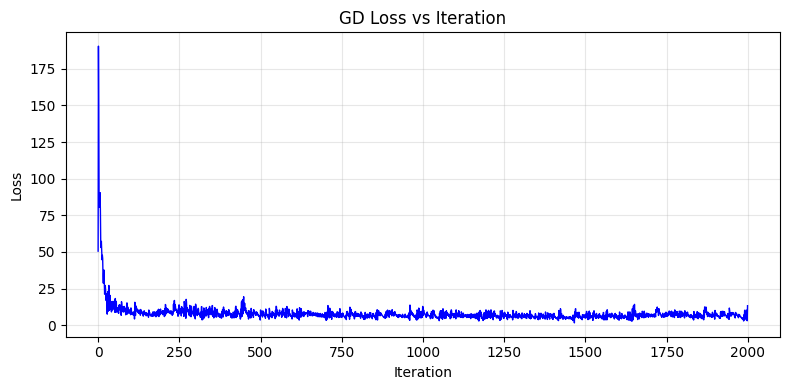

Loss decreased from 50.519932 to 13.248967
Total improvement: 73.77%
Running Neural Network...

--- Sample 6 (Index 704) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.872070
  Inefficiency: 0.999017
  Non-uniformity: 1.027452
Iteration 11/2000
  MSE Error: 4091.614502
  Inefficiency: 0.197845
  Non-uniformity: 0.014684
Iteration 21/2000
  MSE Error: 4091.613770
  Inefficiency: 0.197593
  Non-uniformity: 0.014676
Iteration 31/2000
  MSE Error: 4091.612793
  Inefficiency: 0.197372
  Non-uniformity: 0.012734
Iteration 41/2000
  MSE Error: 4091.612061
  Inefficiency: 0.197055
  Non-uniformity: 0.012658
Iteration 51/2000
  MSE Error: 4091.611572
  Inefficiency: 0.196805
  Non-uniformity: 0.011726
Iteration 61/2000
  MSE Error: 4091.610840
  Inefficiency: 0.196551
  Non-uniformity: 0.012053
Iteration 71/2000
  MSE Error: 4091.610352
  Inefficiency: 0.196334
  Non-uniformity: 0.011719
Iteration 81/2000
  MSE Error: 4091.609863
  Inefficiency: 0.196245
  Non-uni

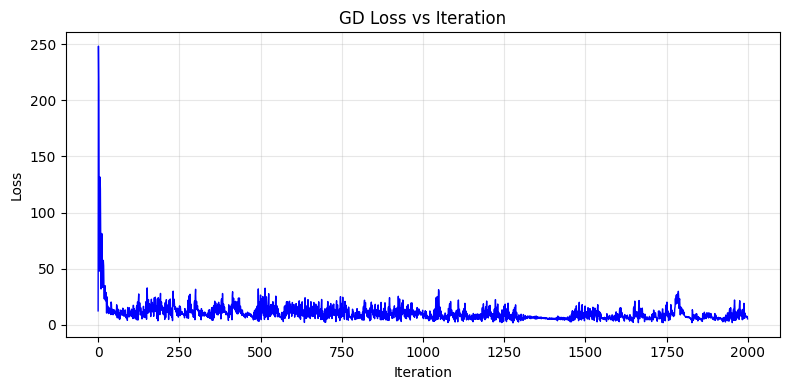

Loss decreased from 12.383319 to 5.231831
Total improvement: 57.75%
Running Neural Network...

--- Sample 7 (Index 810) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.822754
  Inefficiency: 0.998543
  Non-uniformity: 1.276700
Iteration 11/2000
  MSE Error: 4090.948242
  Inefficiency: 0.201666
  Non-uniformity: 0.018463
Iteration 21/2000
  MSE Error: 4090.947021
  Inefficiency: 0.201302
  Non-uniformity: 0.018010
Iteration 31/2000
  MSE Error: 4090.945801
  Inefficiency: 0.200943
  Non-uniformity: 0.013091
Iteration 41/2000
  MSE Error: 4090.944336
  Inefficiency: 0.200596
  Non-uniformity: 0.012540
Iteration 51/2000
  MSE Error: 4090.944336
  Inefficiency: 0.200477
  Non-uniformity: 0.012298
Iteration 61/2000
  MSE Error: 4090.944092
  Inefficiency: 0.200430
  Non-uniformity: 0.011631
Iteration 71/2000
  MSE Error: 4090.944092
  Inefficiency: 0.200391
  Non-uniformity: 0.011137
Iteration 81/2000
  MSE Error: 4090.943848
  Inefficiency: 0.200340
  Non-unif

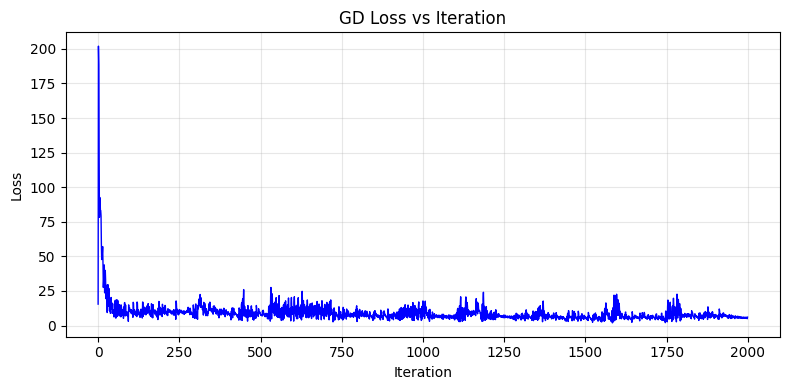

Loss decreased from 15.506748 to 6.101254
Total improvement: 60.65%
Running Neural Network...

--- Sample 8 (Index 212) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.777100
  Inefficiency: 0.998069
  Non-uniformity: 1.073666
Iteration 11/2000
  MSE Error: 4090.935059
  Inefficiency: 0.197142
  Non-uniformity: 0.044859
Iteration 21/2000
  MSE Error: 4090.931885
  Inefficiency: 0.196303
  Non-uniformity: 0.044379
Iteration 31/2000
  MSE Error: 4090.931152
  Inefficiency: 0.195999
  Non-uniformity: 0.042895
Iteration 41/2000
  MSE Error: 4090.930176
  Inefficiency: 0.195776
  Non-uniformity: 0.040162
Iteration 51/2000
  MSE Error: 4090.929688
  Inefficiency: 0.195686
  Non-uniformity: 0.039366
Iteration 61/2000
  MSE Error: 4090.930176
  Inefficiency: 0.195671
  Non-uniformity: 0.039017
Iteration 71/2000
  MSE Error: 4090.930420
  Inefficiency: 0.195668
  Non-uniformity: 0.038844
Iteration 81/2000
  MSE Error: 4090.929688
  Inefficiency: 0.195665
  Non-unif

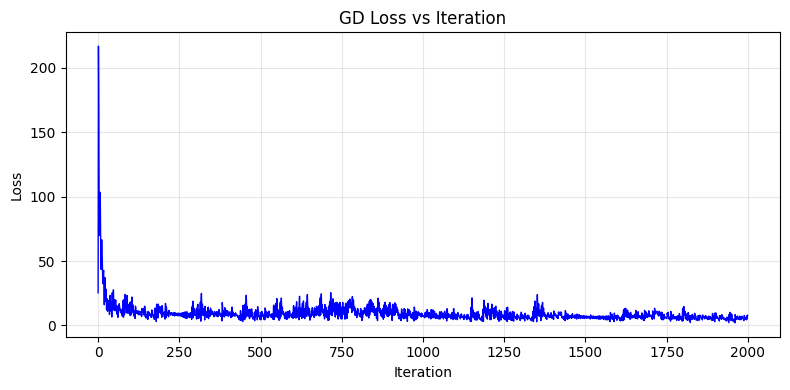

Loss decreased from 25.371445 to 7.964119
Total improvement: 68.61%
Running Neural Network...

--- Sample 9 (Index 307) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.758301
  Inefficiency: 0.997997
  Non-uniformity: 0.490592
Iteration 11/2000
  MSE Error: 4090.942627
  Inefficiency: 0.199964
  Non-uniformity: 0.016539
Iteration 21/2000
  MSE Error: 4090.941406
  Inefficiency: 0.199592
  Non-uniformity: 0.019372
Iteration 31/2000
  MSE Error: 4090.940918
  Inefficiency: 0.199417
  Non-uniformity: 0.018126
Iteration 41/2000
  MSE Error: 4090.940430
  Inefficiency: 0.199259
  Non-uniformity: 0.018285
Iteration 51/2000
  MSE Error: 4090.940186
  Inefficiency: 0.199211
  Non-uniformity: 0.018590
Iteration 61/2000
  MSE Error: 4090.940430
  Inefficiency: 0.199174
  Non-uniformity: 0.018281
Iteration 71/2000
  MSE Error: 4090.939697
  Inefficiency: 0.199151
  Non-uniformity: 0.017816
Iteration 81/2000
  MSE Error: 4090.940186
  Inefficiency: 0.199140
  Non-unif

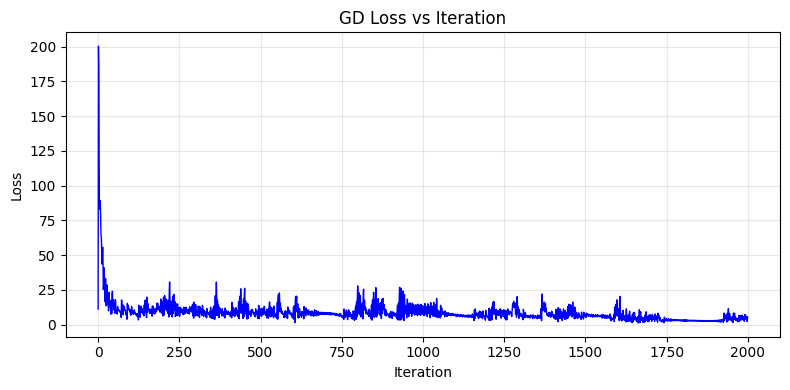

Loss decreased from 11.222309 to 5.538393
Total improvement: 50.65%
Running Neural Network...

--- Sample 10 (Index 425) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.633301
  Inefficiency: 0.996430
  Non-uniformity: 0.871971
Iteration 11/2000
  MSE Error: 4089.795898
  Inefficiency: 0.196754
  Non-uniformity: 0.051578
Iteration 21/2000
  MSE Error: 4089.785645
  Inefficiency: 0.193940
  Non-uniformity: 0.059777
Iteration 31/2000
  MSE Error: 4089.780762
  Inefficiency: 0.192733
  Non-uniformity: 0.058609
Iteration 41/2000
  MSE Error: 4089.779785
  Inefficiency: 0.192523
  Non-uniformity: 0.058796
Iteration 51/2000
  MSE Error: 4089.779785
  Inefficiency: 0.192455
  Non-uniformity: 0.059592
Iteration 61/2000
  MSE Error: 4089.780029
  Inefficiency: 0.192431
  Non-uniformity: 0.060096
Iteration 71/2000
  MSE Error: 4089.779541
  Inefficiency: 0.192421
  Non-uniformity: 0.060387
Iteration 81/2000
  MSE Error: 4089.779785
  Inefficiency: 0.192417
  Non-uni

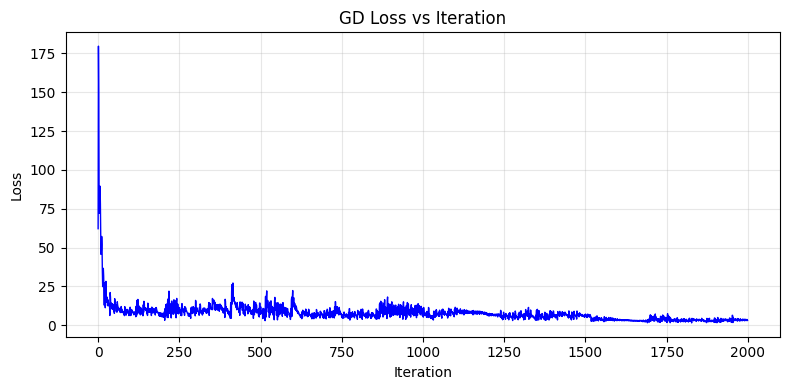

Loss decreased from 62.181461 to 3.172268
Total improvement: 94.90%
Running Neural Network...


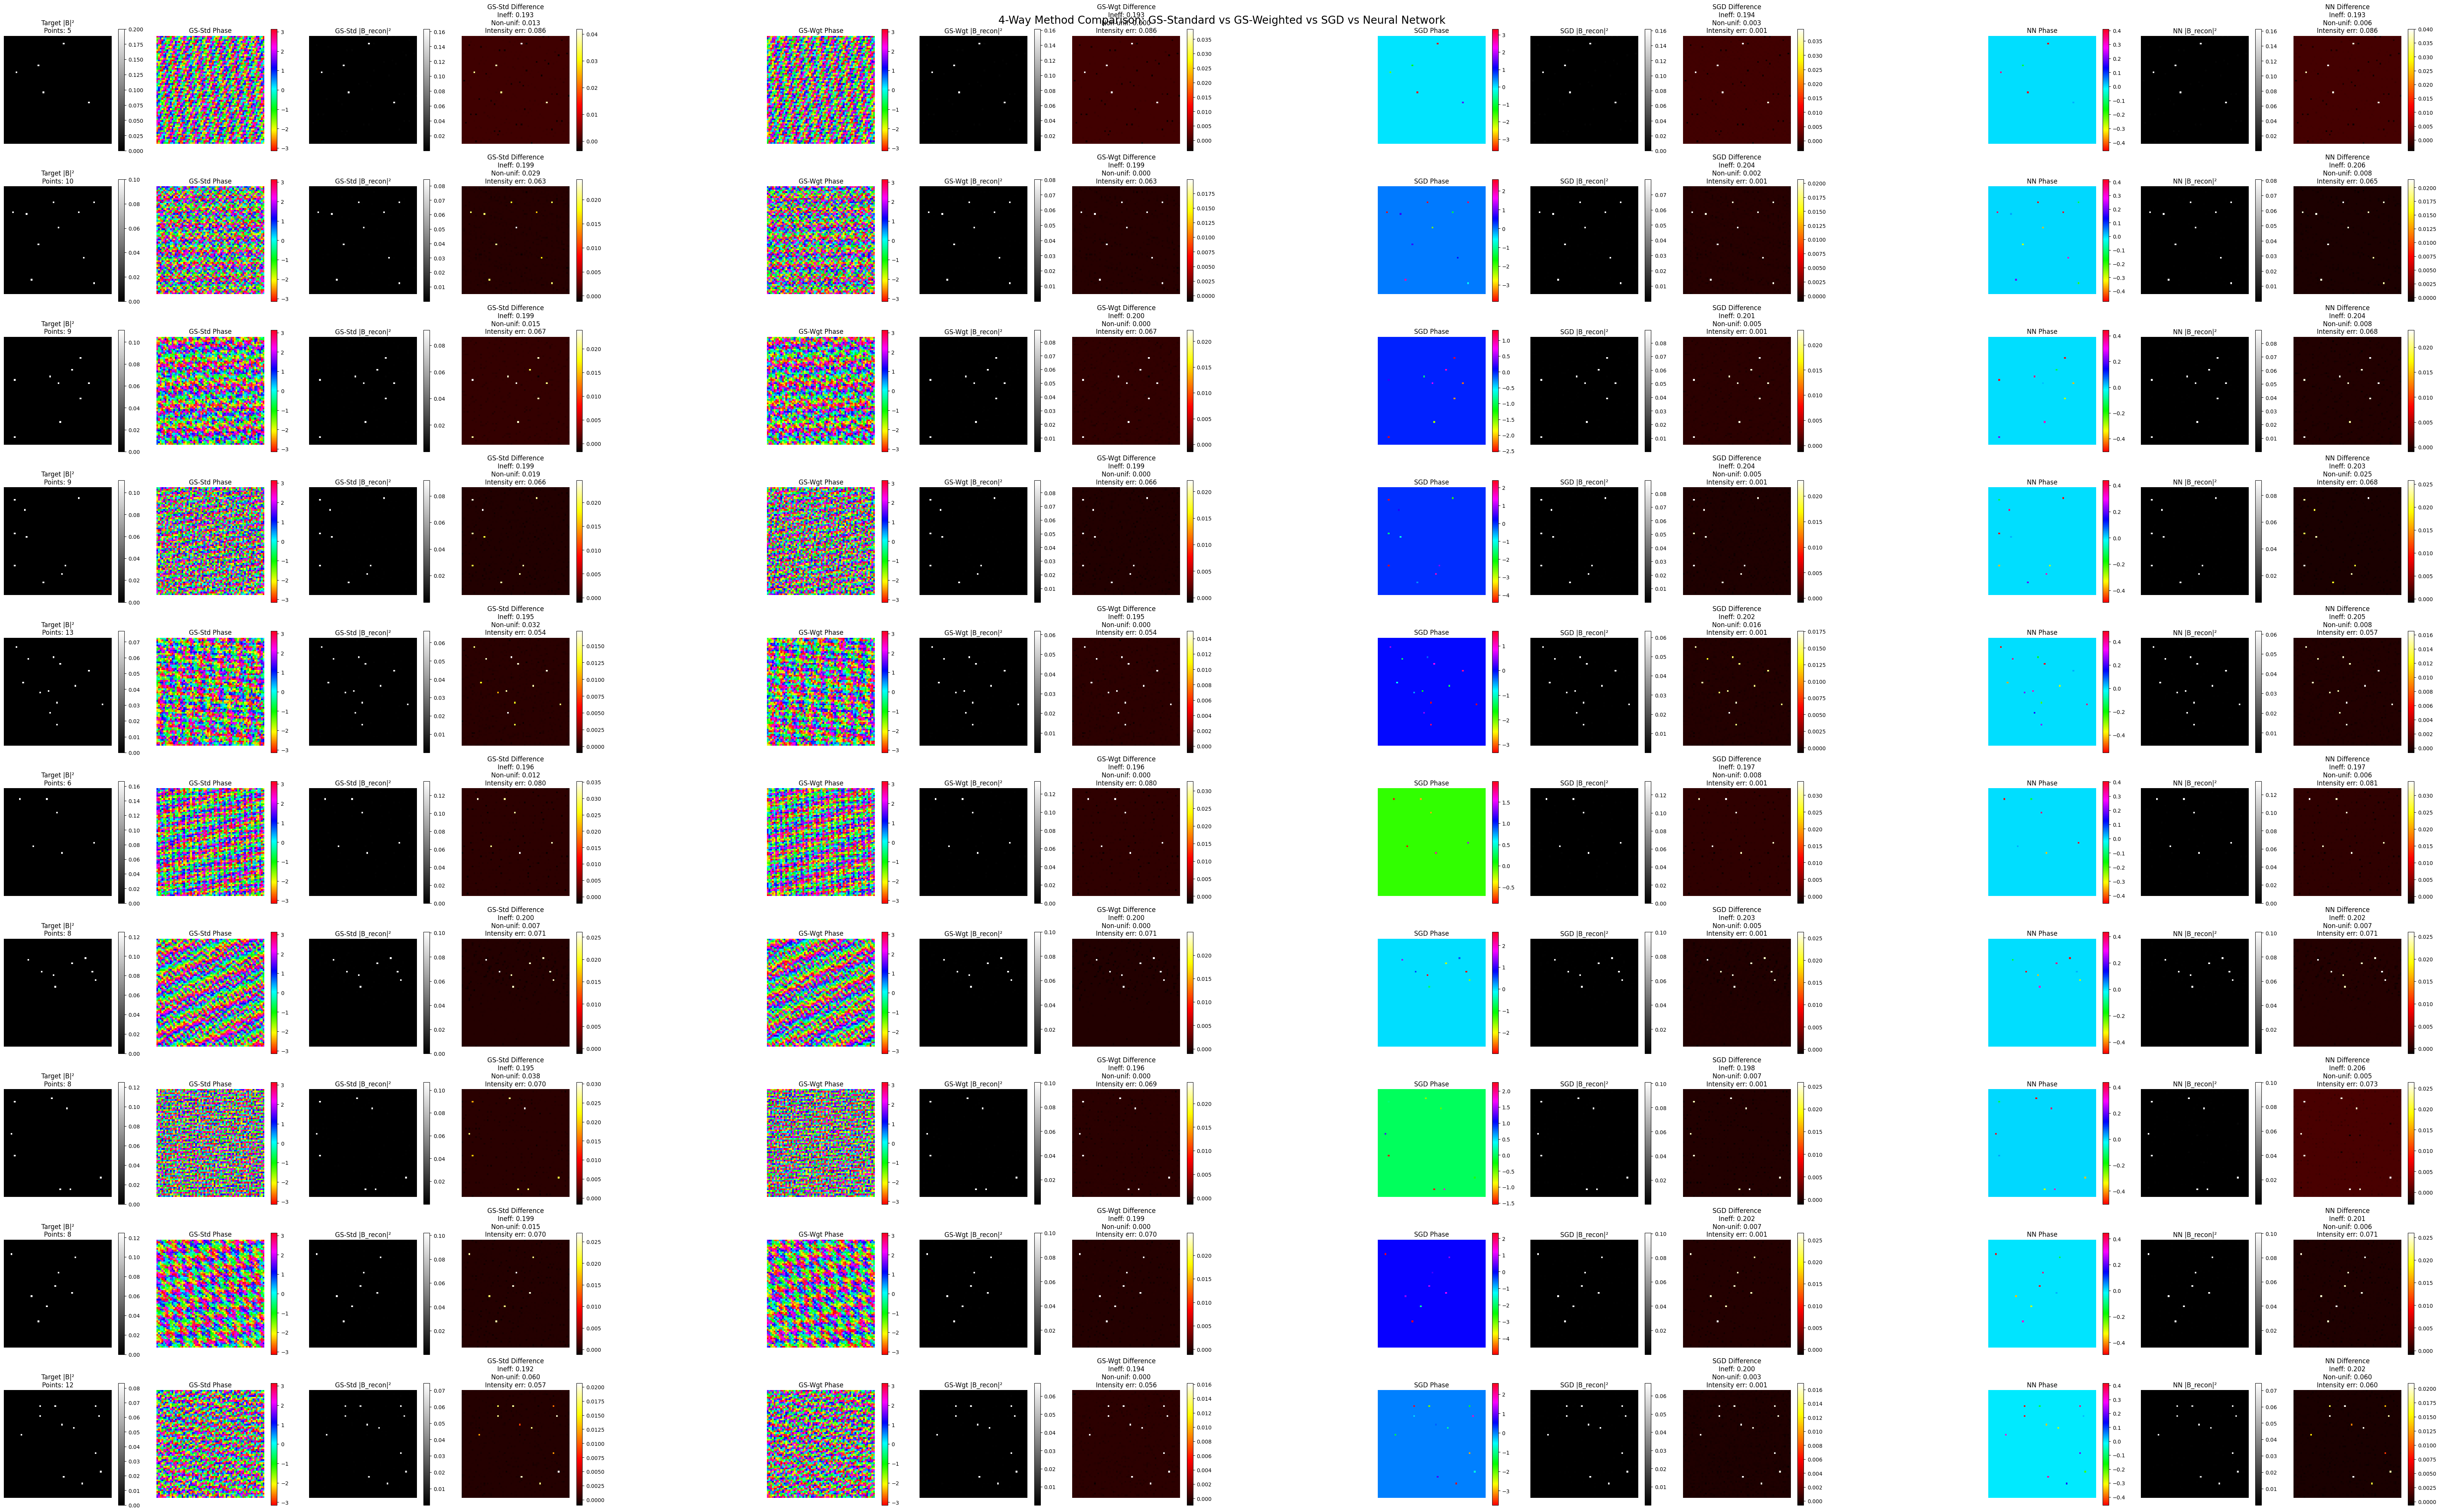


4-WAY METHOD COMPARISON SUMMARY

GS-Standard (Average over 10 samples):
  Inefficiency:    0.19665833
  Non-uniformity:  0.02403977
  Intensity error: 0.06850290
  Reconstruction time: 2.47840233 seconds

GS-Weighted (Average over 10 samples):
  Inefficiency:    0.19706622
  Non-uniformity:  0.00000244
  Intensity error: 0.06825695
  Reconstruction time: 2.62816080 seconds

SGD (Average over 10 samples):
  Inefficiency:    0.20037203
  Non-uniformity:  0.00617744
  Intensity error: 0.00109314
  Reconstruction time: 18.38202399 seconds

NN (Average over 10 samples):
  Inefficiency:    0.20205684
  Non-uniformity:  0.01394200
  Intensity error: 0.07005317
  Reconstruction time: 0.00705526 seconds

4-way comparison complete! Results:

4-WAY METHOD COMPARISON SUMMARY

GS-Standard (Average over 10 samples):
  Inefficiency:    0.19665833
  Non-uniformity:  0.02403977
  Intensity error: 0.06850290
  Reconstruction time: 2.47840233 seconds

GS-Weighted (Average over 10 samples):
  Inefficienc

In [ ]:
from vanillanet.compare import compare_all_methods, print_comparison_summary

comparison_results = compare_all_methods(
    dataset=dataset,
    model=model,
    device=device,
    num_samples=10,
    save_path='images/all_methods_comparison.png'
)

# print("\n4-way comparison complete! Results:")
# print_comparison_summary(comparison_results)

print("\nSaved visualization to 'images/all_methods_comparison.png'")